* # Box-Plots: Finding Outliers

This notebook presents a quick way of finding the values of all outliers appearing in box-plots.

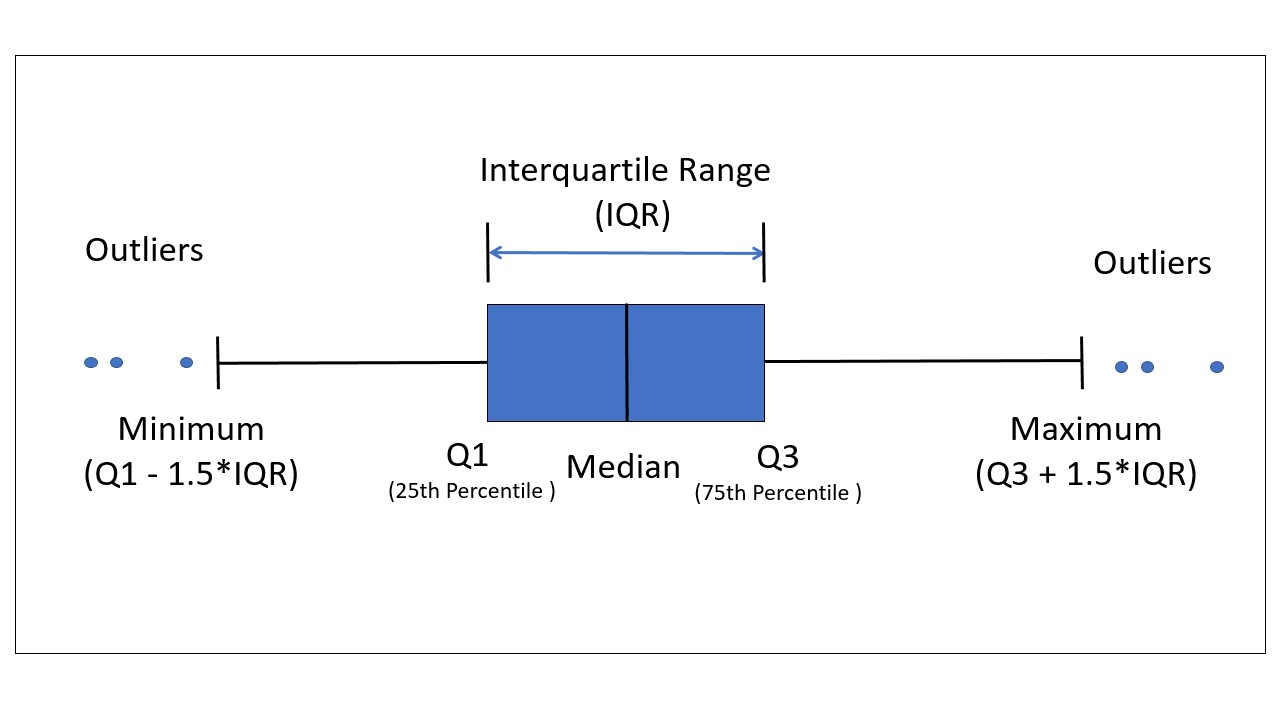

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [ ]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [ ]:
data_outliers = pd.DataFrame([])

In [ ]:
for i in tips.copy().day.unique():
    df_outlier = tips.copy().sort_values(['day'])
    df_outlier = df_outlier.loc[df_outlier['day'] == i, :].reset_index(drop=True)
    df_outlier = df_outlier[['day', 'total_bill']].set_index('day').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    data_outliers = data_outliers.append(df_outlier) 

In [ ]:
data_outliers.reset_index(drop=True)

Check the above box-plot, these are actually the outlier values!